In [2]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## Data Preparation

In [3]:
df=pd.read_csv("crypto_data.csv",index_col=0)
df.head(2)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,41.999954,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000


In [4]:
#Discard all cryptocurrencies that are not being traded.
IsTrading_df=df[df['IsTrading']==True].drop('IsTrading',axis=1)
IsTrading_df.head(2)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,41.999954,42
365,365Coin,X11,PoW/PoS,NaN,2300000000


In [5]:
#Remove all rows that have at least one null value.
null_cleaned_df=IsTrading_df.dropna()
null_cleaned_df.head(2)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000


In [6]:
#Filter for cryptocurrencies that have been mined
mined_df=null_cleaned_df[null_cleaned_df['TotalCoinsMined']>0]
mined_df.head(2)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000


In [7]:
#delete the CoinName from the original dataframe.
mined_df=mined_df.drop('CoinName',axis=1)
mined_df.head(2)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000


In [8]:
#convert the remaining features with text values, Algorithm and ProofType, into numerical data
dummy_df=pd.get_dummies(data=mined_df,columns=['ProofType','Algorithm'])
dummy_df.shape

(532, 98)

In [9]:
# Standardize dataset
scaled=StandardScaler().fit_transform(dummy_df)
scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283]])

## Dimensionality Reduction

### PCA

In [10]:
#Perform dimensionality reduction with PCA
#For this project, preserve 90% of the explained variance in dimensionality reduction
pca=PCA(n_components=.90)
X_reduced = pca.fit_transform(scaled)
print(f'explained_variance:{pca.explained_variance_.sum()}')
#How did the number of the features change
print(f'number of the features before using pca : {scaled.shape[1]}')
print(f'number of the features after using pca: {X_reduced.shape[1]}')

explained_variance:88.47283457566155
number of the features before using pca : 98
number of the features after using pca: 74


In [11]:
X_reduced_df = pd.DataFrame(data= X_reduced)
X_reduced_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,3.881650e-12,-4.485837e-14,-4.865266e-14,-0.007129,-1.319756,-0.051813,...,-2.544293e-15,-1.600006e-15,8.169842e-16,-8.622522e-16,-8.160626e-16,1.763836e-15,1.941427e-15,2.291098e-15,5.581325e-15,-9.792776e-16
1,-0.318434,1.032331,-0.591126,0.001386,3.849447e-12,-4.439028e-14,-4.840621e-14,-0.007739,-1.322514,-0.056674,...,-2.405305e-15,-2.067953e-15,5.504887e-16,-5.098930e-16,-4.218445e-16,1.727289e-15,2.209923e-15,3.039996e-15,6.237295e-15,-1.484209e-15


### t_SNE

In [12]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(X_reduced_df)


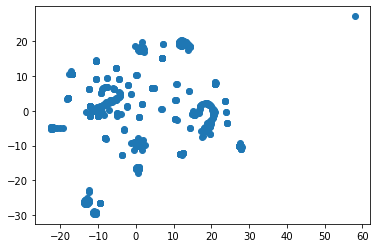

In [13]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## K_means

### Clustring without Dimensionality Reduction

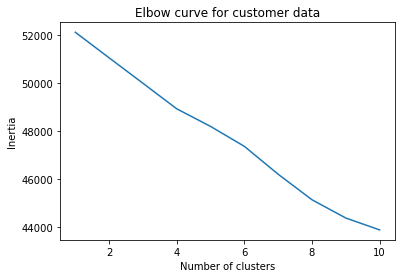

In [14]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
#plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

### Clustring after Dimensionality Reduction by PCA

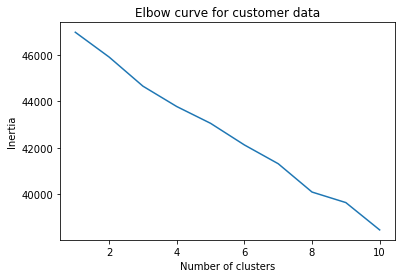

In [15]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_reduced_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
#plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

### Clustring after Dimensionality Reduction by PCA and tSNE

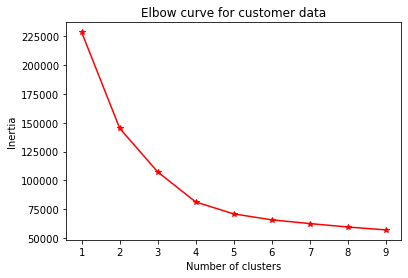

In [19]:
tsne_df=X_reduced_df.copy()
tsne_df['tsne_1']=tsne_features[:,0]
tsne_df['tsne_2']=tsne_features[:,1]

inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'],'*-r')
#plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” in the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4. it means the point at which the elbow shape is created is 4.

#### Recommendation 
If we use both dimensionality Reduction PCA and t_SNA we would be able to cluster data to 4 groups but without using dimensionality Reduction the clustering into less than 10 groups won't make sense. 

In [20]:
# to show how it would be after clustering to 4!
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data
def show_clusters(df):
    plt.scatter(df['tsne_1'], df['tsne_2'], c=df['class'])
    plt.xlabel('tsne_1')
    plt.ylabel('tsne_2')
    plt.show()


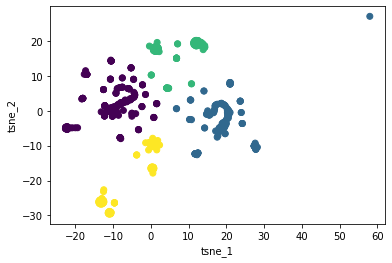

In [21]:
clusters = get_clusters(4, tsne_df)

show_clusters(clusters)
